In [1]:
from Module_20220302 import *

In [2]:
tmax = 200
N_ics = 50
ic_range = [0.1,5]

table_aFGF = []
table_aFGF = np.array([]).reshape(0,12)

for FGF in [0.85]:
    for equations in [equations_NG_and_F, equations_NGE_and_F]:
        if equations == equations_NG_and_F:
            file_label = 2
            ics = generate_ic_to_scan_deterministic_triangle(parameters, ic_range=ic_range, N_points_1D = N_ics, file_label = file_label)
            table2 = scan_ic_timess(parameters, equations, FGF, ics, tmax, file_label = file_label)
        if equations == equations_NGE_and_F:
            file_label = 3
            ics = generate_ic_to_scan_deterministic_triangle(parameters, ic_range=ic_range, N_points_1D = N_ics, file_label = file_label)
            table3 = scan_ic_timess(parameters, equations, FGF, ics, tmax, file_label = file_label)
    table = np.concatenate((table2,table3),axis=1)
    table_aFGF = np.concatenate((table_aFGF,table), axis=0)

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101


In [3]:
table_pd = pd.DataFrame(table_aFGF)
table_pd[12] = table_pd[10]-table_pd[4] # GNFE-GNF
table_pd[13] = (table_pd[10]+table_pd[4])/2
table_pd[14] = (table_pd[12]/table_pd[13])*100
table_pd.columns=["FGF_GNF","ICG_GNF","ICN_GNF","ICE_GNF","time_to_ss_GNF","network","FGF_GNEF","ICG_GNEF","ICN_GNEF","ICE_GNEF","time_to_ss_GNEF","network","delta_tss","average_tss","delta_tss_norm"]
#table_pd['delta_tss'] = table_pd['delta_tss'].astype(float)
table_pd

,FGF_GNF,ICG_GNF,ICN_GNF,ICE_GNF,time_to_ss_GNF,network,FGF_GNEF,ICG_GNEF,ICN_GNEF,ICE_GNEF,time_to_ss_GNEF,network,delta_tss,average_tss,delta_tss_norm
0,0.85,0.100000,0.100000,0.0,23.384466,2.0,0.85,0.100000,0.100000,0.994172,24.639750,3.0,1.255283,24.012108,5.227710
1,0.85,0.108311,0.100000,0.0,26.199693,2.0,0.85,0.108311,0.100000,0.994172,24.693068,3.0,-1.506625,25.446380,-5.920783
2,0.85,0.117313,0.100000,0.0,25.467558,2.0,0.85,0.117313,0.100000,0.994172,24.815131,3.0,-0.652427,25.141344,-2.595037
3,0.85,0.127063,0.100000,0.0,24.629214,2.0,0.85,0.127063,0.100000,0.994172,24.893837,3.0,0.264623,24.761525,1.068685
4,0.85,0.137623,0.100000,0.0,24.506427,2.0,0.85,0.137623,0.100000,0.994172,25.419576,3.0,0.913148,24.963001,3.658007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,0.85,0.260660,4.616333,0.0,21.769302,2.0,0.85,0.260660,4.616333,12.938704,22.996612,3.0,1.227310,22.382957,5.483235
2193,0.85,0.282324,4.616333,0.0,21.794079,2.0,0.85,0.282324,4.616333,12.938704,23.038589,3.0,1.244510,22.416334,5.551802
2194,0.85,0.305788,4.616333,0.0,21.817026,2.0,0.85,0.305788,4.616333,12.938704,23.083291,3.0,1.266265,22.450159,5.640338
2195,0.85,0.331202,4.616333,0.0,21.837371,2.0,0.85,0.331202,4.616333,12.938704,23.130961,3.0,1.293590,22.484166,5.753336


In [4]:
FGF85 = table_pd

In [5]:
FGF85ratio = (np.shape(FGF85.loc[(FGF85['delta_tss'] > 0)])[0])/(np.shape(FGF85.loc[(FGF85['delta_tss'] < 0)])[0])
print(FGF85ratio)
print(np.shape(FGF85.loc[(FGF85['delta_tss'] > 0)])[0])
print(np.shape(FGF85.loc[(FGF85['delta_tss'] < 0)])[0])
print(np.shape(FGF85)[0])

print(np.shape(FGF85.loc[(FGF85['delta_tss'] > 0)])[0]/(np.shape(FGF85)[0]))
print(np.shape(FGF85.loc[(FGF85['delta_tss'] < 0)])[0]/(np.shape(FGF85)[0]))

1.948993288590604
1452
745
2197
0.6609012289485662
0.33909877105143377


In [6]:
FGF85ratio = (np.shape(FGF85.loc[(FGF85['delta_tss_norm'] > 0)])[0])/(np.shape(FGF85.loc[(FGF85['delta_tss_norm'] < 0)])[0])
print(FGF85ratio)
print(np.shape(FGF85.loc[(FGF85['delta_tss_norm'] > 0)])[0])
print(np.shape(FGF85.loc[(FGF85['delta_tss_norm'] < 0)])[0])
print(np.shape(FGF85)[0])

print(np.shape(FGF85.loc[(FGF85['delta_tss_norm'] > 0)])[0]/(np.shape(FGF85)[0]))
print(np.shape(FGF85.loc[(FGF85['delta_tss_norm'] < 0)])[0]/(np.shape(FGF85)[0]))

1.948993288590604
1452
745
2197
0.6609012289485662
0.33909877105143377


Text(0.5, 0, 'tssGNF-tssGNEF')

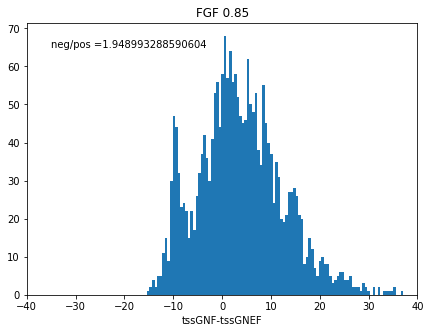

In [11]:
plt.figure(figsize = (7,5))
plt.subplot(1, 1, 1)

plt.xlim(-40,40)
#plt.ylim(0,100)
plt.hist(FGF85['delta_tss_norm'], bins = 100)
plt.title("FGF 0.85")
plt.text(-35,65, s ='neg/pos =' + str(FGF85ratio))
plt.xlabel("tssGNF-tssGNEF")

/opt/conda/envs/EGENmodel/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


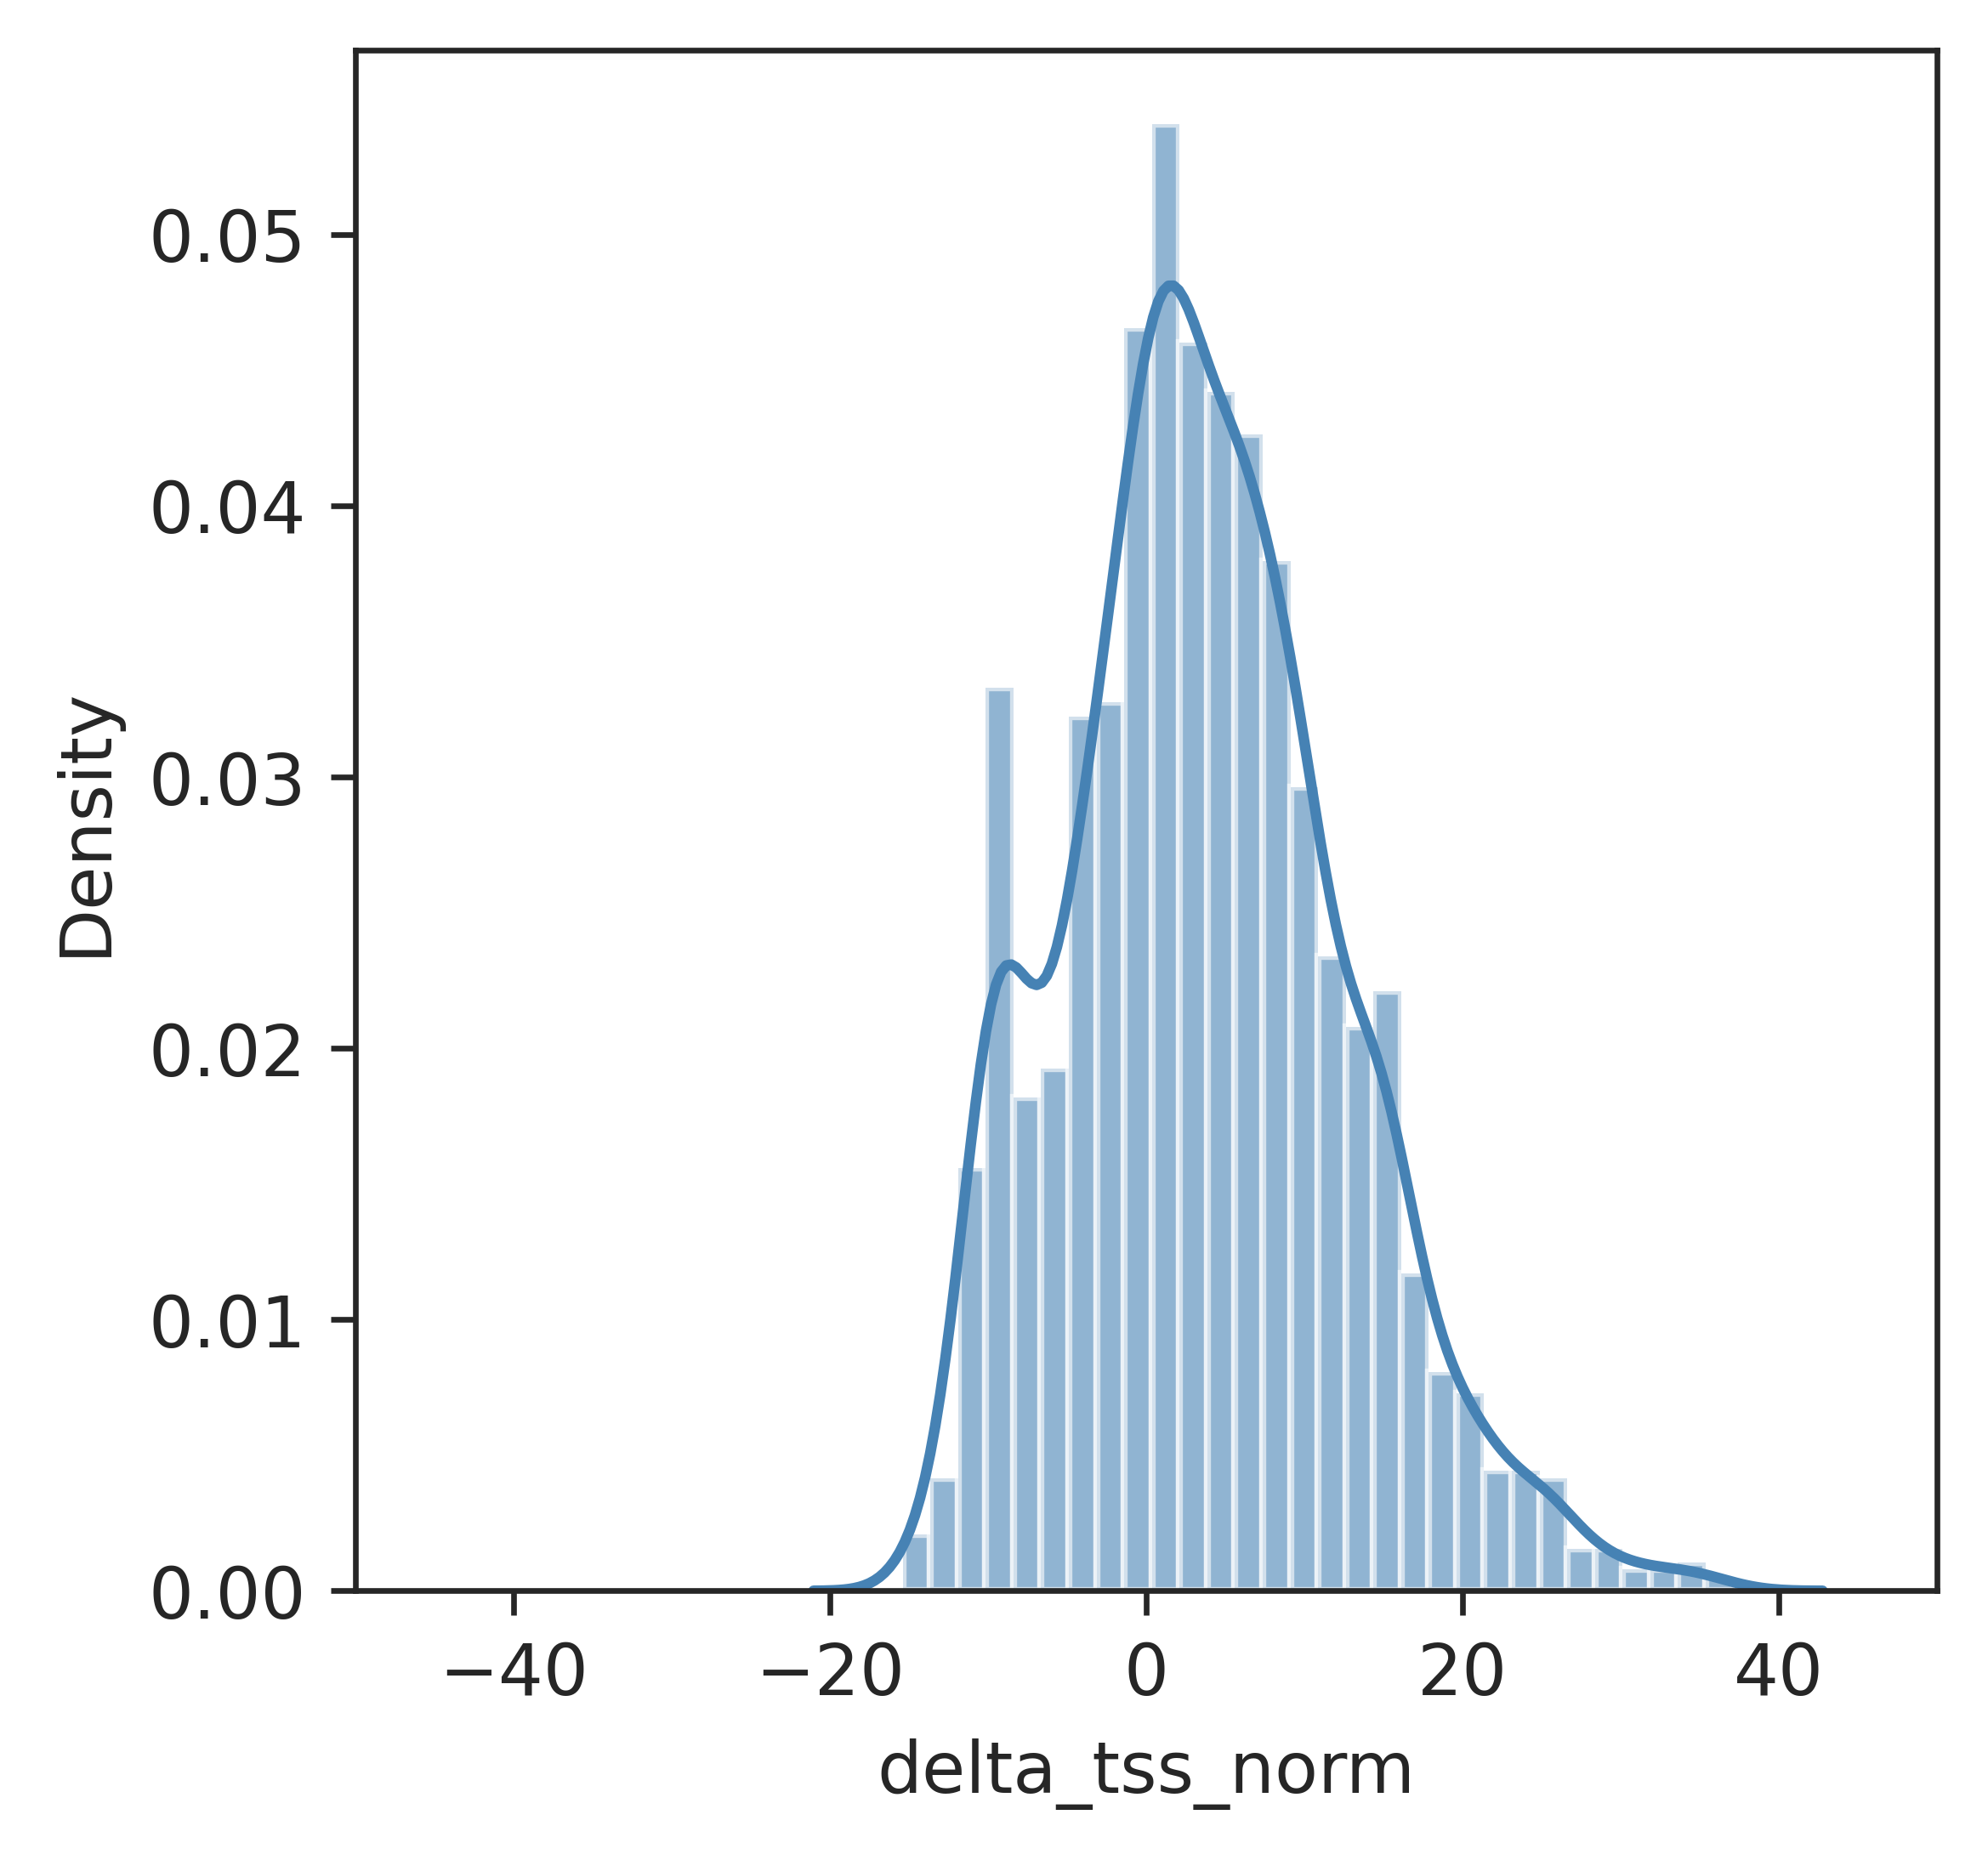

In [12]:
sns.set_style("ticks")

# Import data

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':1.5}, bins = 30)

plt.figure(figsize=(4,4), dpi= 600)

#plt.plot([0, 0], [0, 0.23], 'k-', lw=2)
#plt.xticks([-10,-7.5,-5,-2.5,0, 0.25,5,7,5,10])
#plt.yticks([0, 0.05, 0.1, 0.15, 0.2])
plt.xlim(-50,50)
sns.distplot(FGF85['delta_tss_norm'], color="steelblue", **kwargs)
plt.savefig('delay_norm.svg')
